# Matplotlib

Matplotlib is a comprehensive library that is able to create statis, interactive and animated visualization in Python. Matplotlib is extensively used within data analysis and scientific computing communities.

In [1]:
# Read in the data that was used in the last session and import the matplotlib package.  
import pandas as pd
air_pollution_data_2023_complete_dataset = pd.read_csv("data/LEED_air_pollution_monitoring_station_2023_complete_dataset.csv", index_col=0)
import matplotlib.pyplot as plt


Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib's power lies in its simplicity for quick plotting, extensive capability for complex visualizations, and its pivotal role in the Python data science ecosystem, making it an essential tool for data analysts, scientists, and researchers.

## Anatomy of A Matptlolib Plot
The following code is from the matplotlib documentation that describes all the different parts of a standard plot, avaliable via the [documentation](https://matplotlib.org/stable/gallery/showcase/anatomy.html)

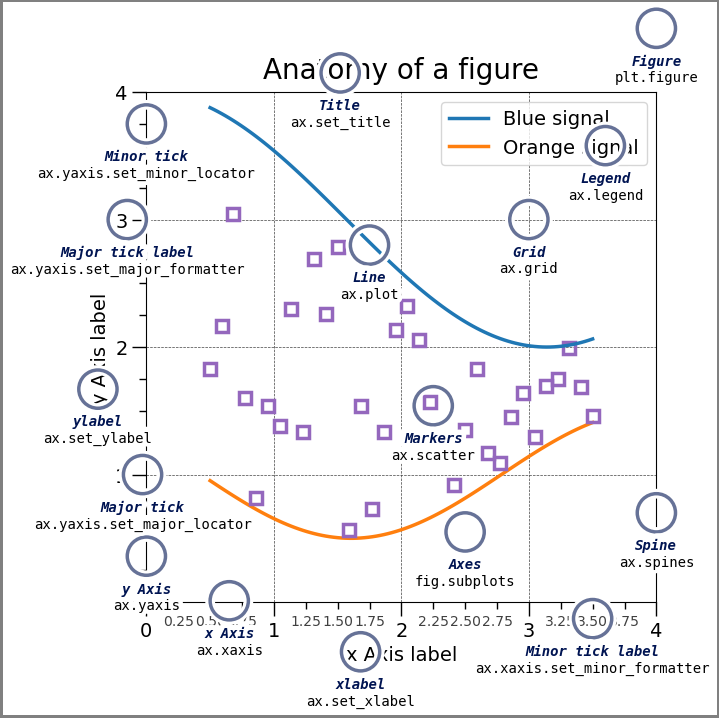

In [2]:

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

royal_blue = [0, 20/256, 82/256]


# make the figure

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1)

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Annotate the figure

def annotate(x, y, text, code):
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='monospace',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()

## A basic figure

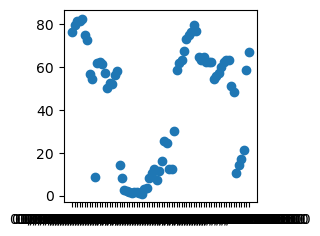

In [3]:
air_pollution_data_2023_complete_dataset_start = air_pollution_data_2023_complete_dataset.head(24*3)

fig, axes = plt.subplots(1, figsize=(2.5,2.5))
axes.scatter(air_pollution_data_2023_complete_dataset_start["date"], air_pollution_data_2023_complete_dataset_start["O3"])

## Improving the presentation of a figure
As seen in the above plot, it is simple to plot data with Matpltolib, but there are a range of issues with the current iteration of the plots, namely:
* The figure size is small
* The tick marks on the axis are dense and difficult to read 
* The axis labels are missing 
* There is currently no title
* Some of the text on the plot is small


Each of the above problems can be solved with different parameters available in the Matplotlib package, which we will go through now. 

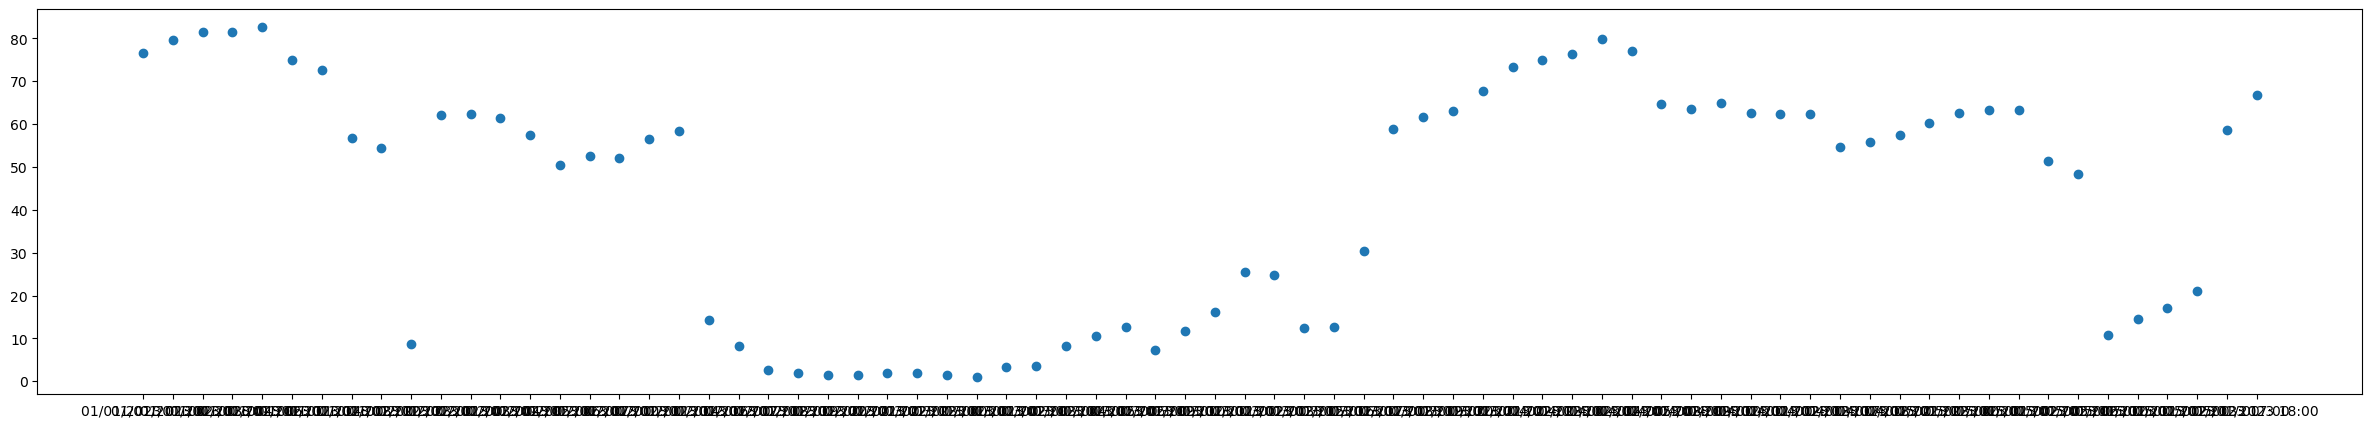

In [4]:
fig, axes = plt.subplots(1, figsize=(30,5))
axes.scatter(air_pollution_data_2023_complete_dataset_start["date"], air_pollution_data_2023_complete_dataset_start["O3"])
plt.show()

### rotation Parameter 
With the new size of the figure alot of the content of the figure can be read alot easier. However the x axis labels still overlap each other quite significantly. The use of the rotation parameter when accessing the xticks object allows us to rotate the axis. 

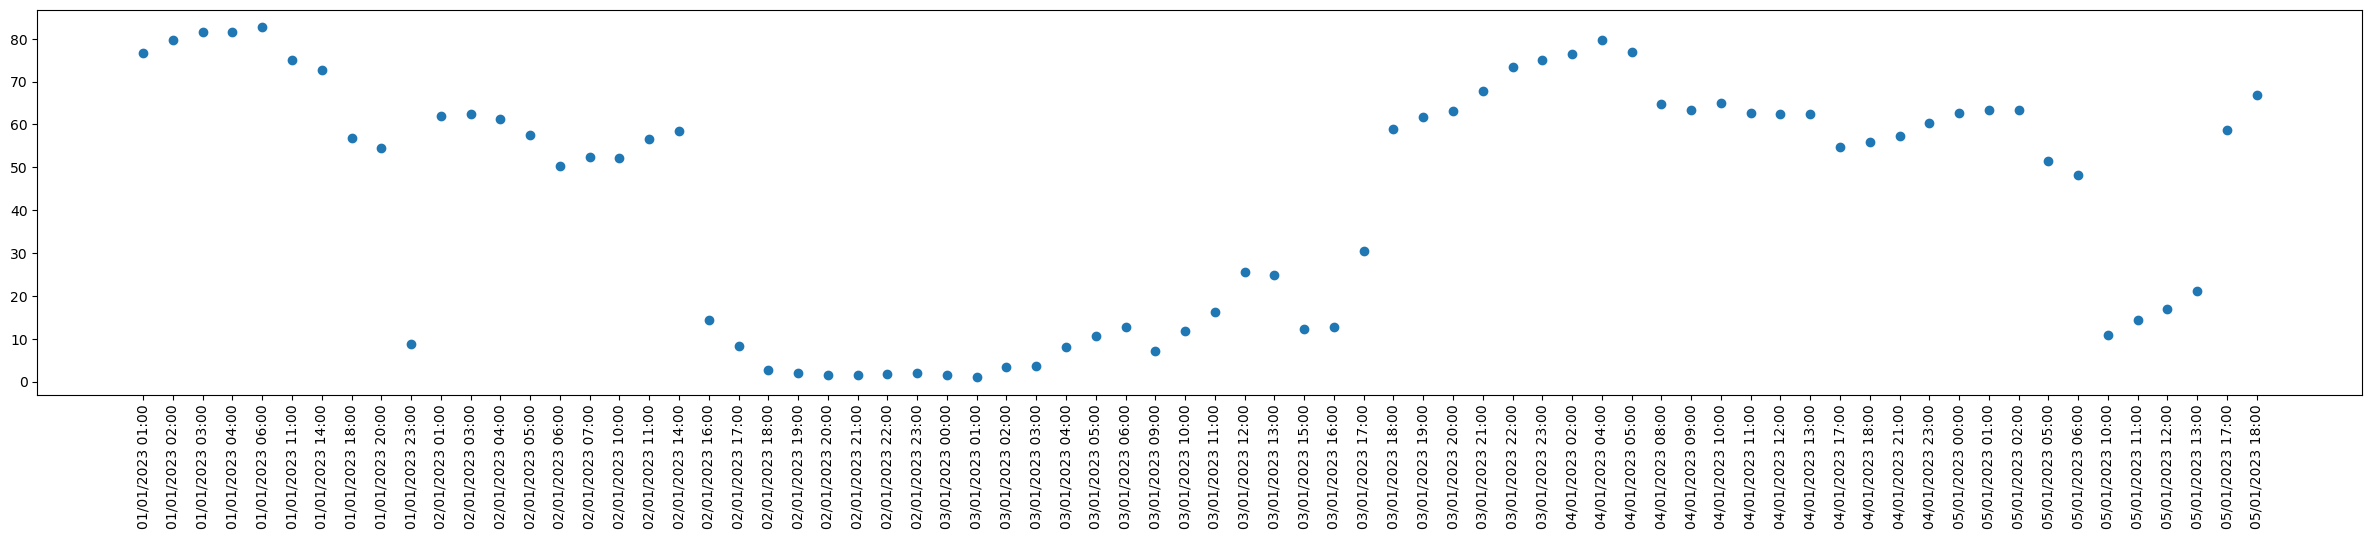

In [5]:
fig, axes = plt.subplots(1, figsize=(30,5))
axes.scatter(air_pollution_data_2023_complete_dataset_start["date"], air_pollution_data_2023_complete_dataset_start["O3"])
axes.tick_params(axis='x', rotation=90)
plt.show()

### set_label functions 
We are not in a position where the majoirty of the content in the figure is readable and we may want to add labels to the axis. To do this we can make use of the set_xlabel and set_ylabel to add labels to the respective axis. 

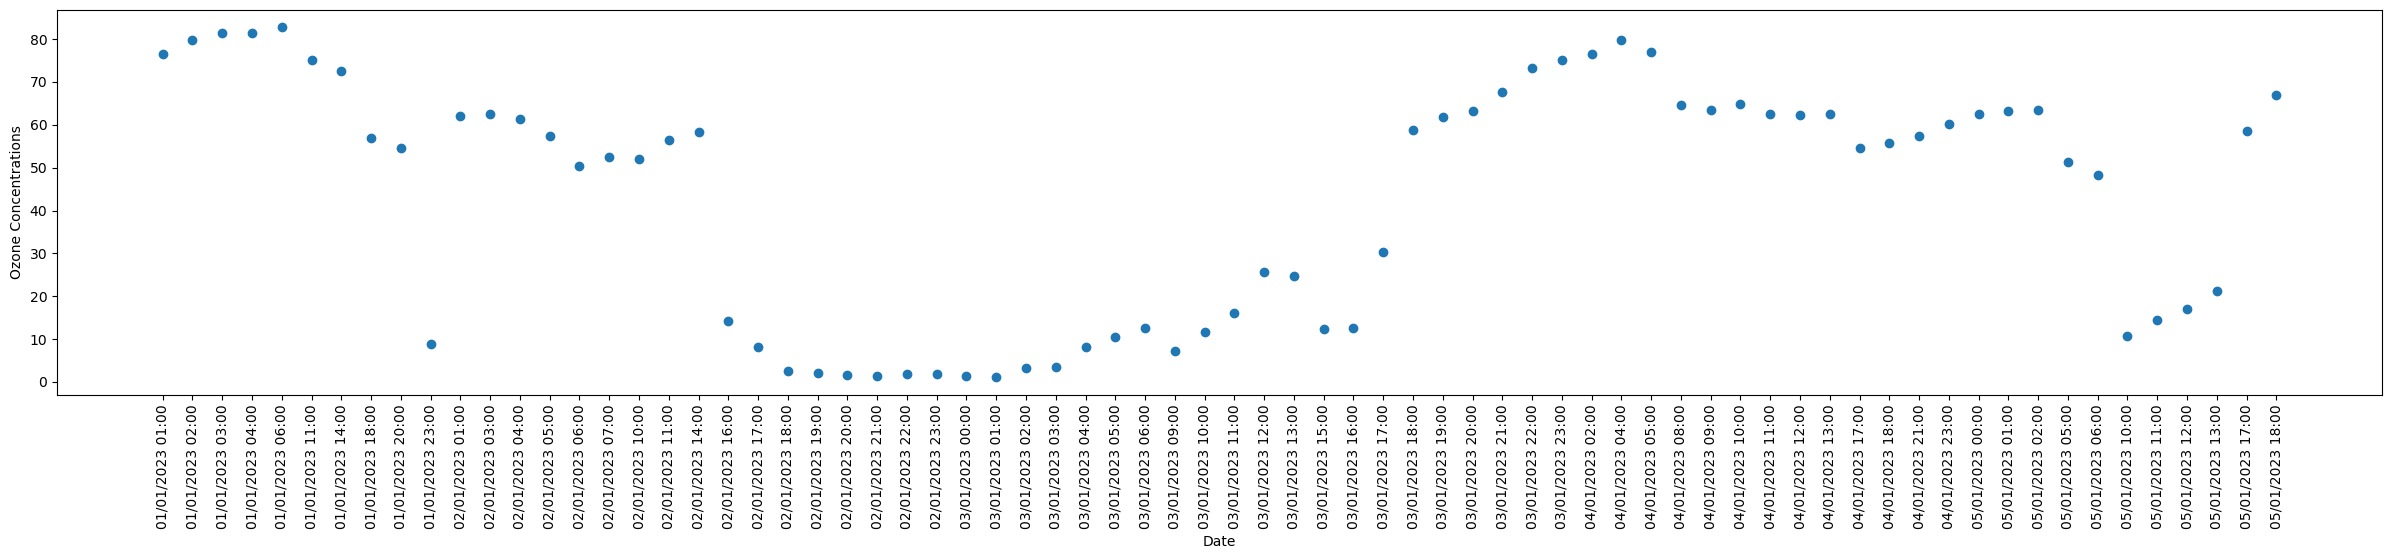

In [6]:
fig, axes = plt.subplots(1, figsize=(30,5))
axes.scatter(air_pollution_data_2023_complete_dataset_start["date"], air_pollution_data_2023_complete_dataset_start["O3"])
axes.set_xlabel("Date")
axes.set_ylabel("Ozone Concentrations")
axes.tick_params(axis='x', rotation=90)
plt.show()

### set_title function
The plot currently does not have a title, which can be added in a similar manner to the axis labels with the use of the set_title function. 

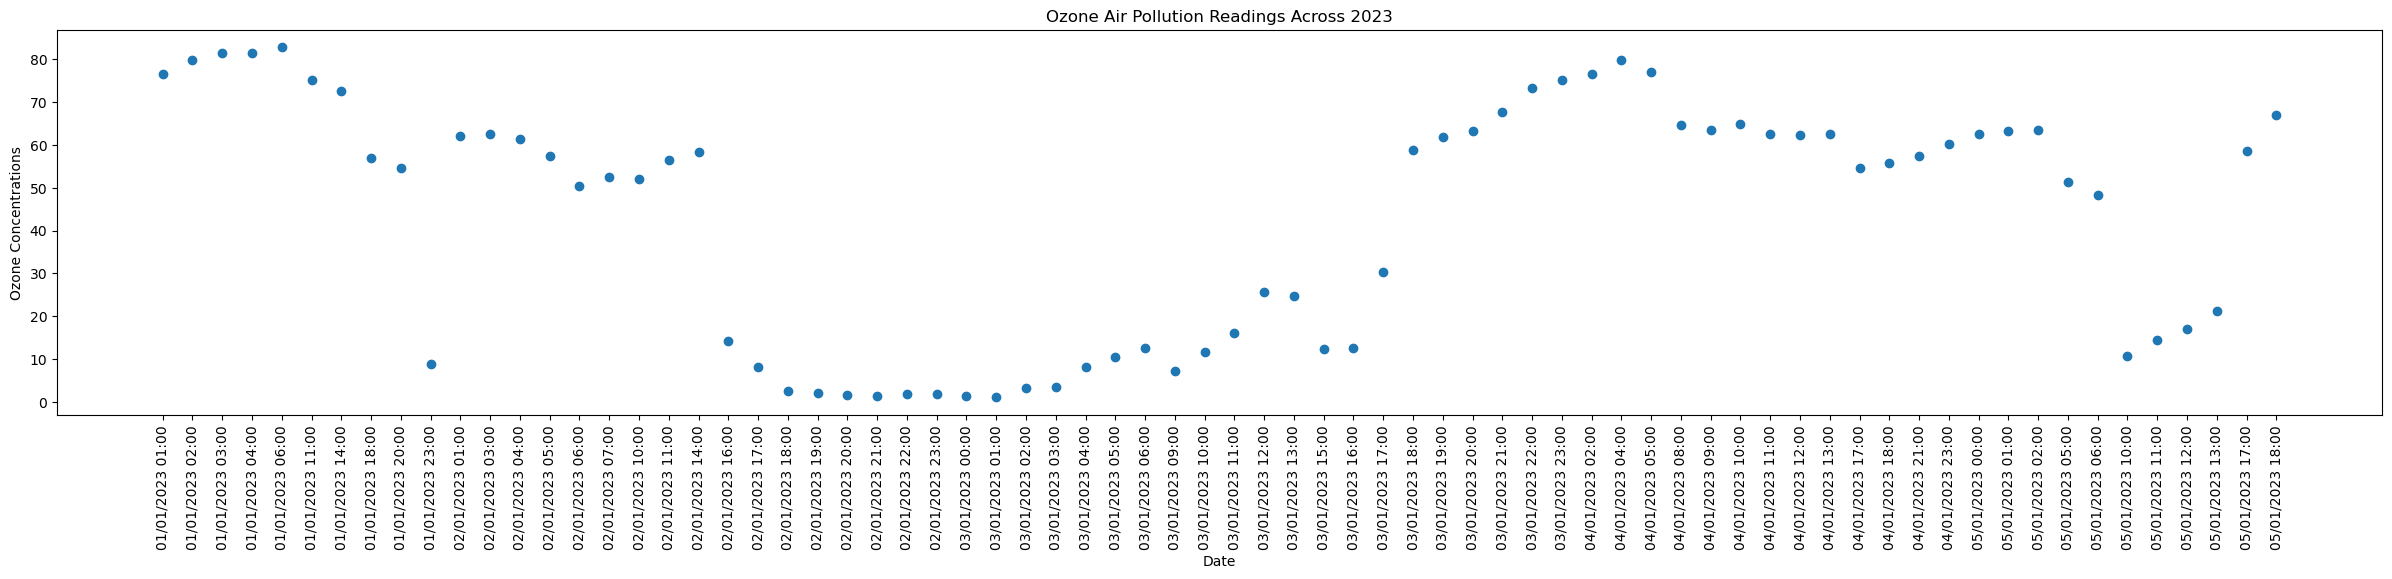

In [7]:
fig, axes = plt.subplots(1, figsize=(30,5))
axes.scatter(air_pollution_data_2023_complete_dataset_start["date"], air_pollution_data_2023_complete_dataset_start["O3"])
axes.set_title("Ozone Air Pollution Readings Across 2023")
axes.set_xlabel("Date")
axes.set_ylabel("Ozone Concentrations")
axes.tick_params(axis='x', rotation=90)
plt.show()

### Changing text size
Now that much of the figure's content has been added, the next problem is the size of the text across the figure. A lot of the functions that have been used so far have the parameter "fontsize" that allows us to change the size of the text. 
The axis labels themselves can also have their size increased by using the function tick_params

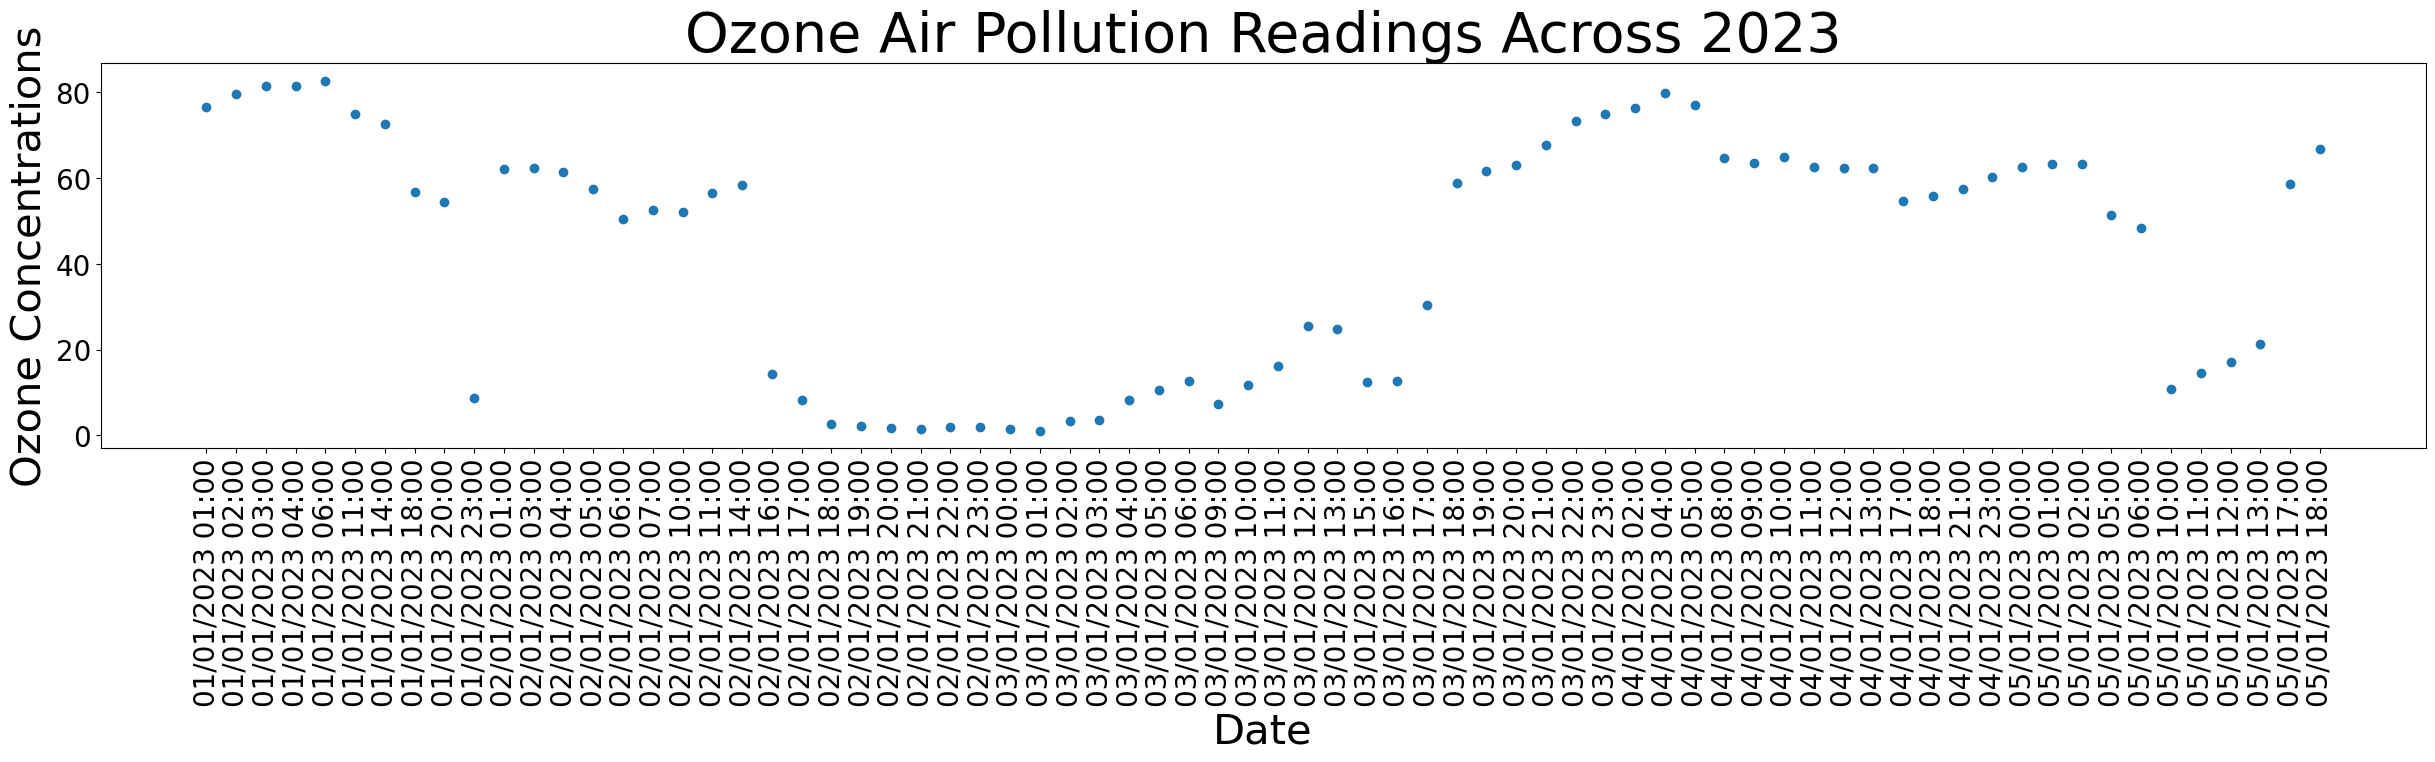

In [8]:
fig, axes = plt.subplots(1, figsize=(30,5))
axes.scatter(air_pollution_data_2023_complete_dataset_start["date"], air_pollution_data_2023_complete_dataset_start["O3"])
axes.set_title("Ozone Air Pollution Readings Across 2023", fontsize=40)
axes.set_xlabel("Date", fontsize=30)
axes.set_ylabel("Ozone Concentrations", fontsize=30)

axes.tick_params(axis='both', which='major', labelsize=20)

axes.tick_params(axis='x', rotation=90)
plt.show()

There are also a range of other changes that could be made to the figure, such as the changing of the point colors, the transparency of the points and many many more. 

### Sub Axes 
It might be the case that we want to have multiple different plots on the same figures. To achieve this we can adapt the existing code for subplots. Where the first two arguements of the function specify the number of rows and columns.

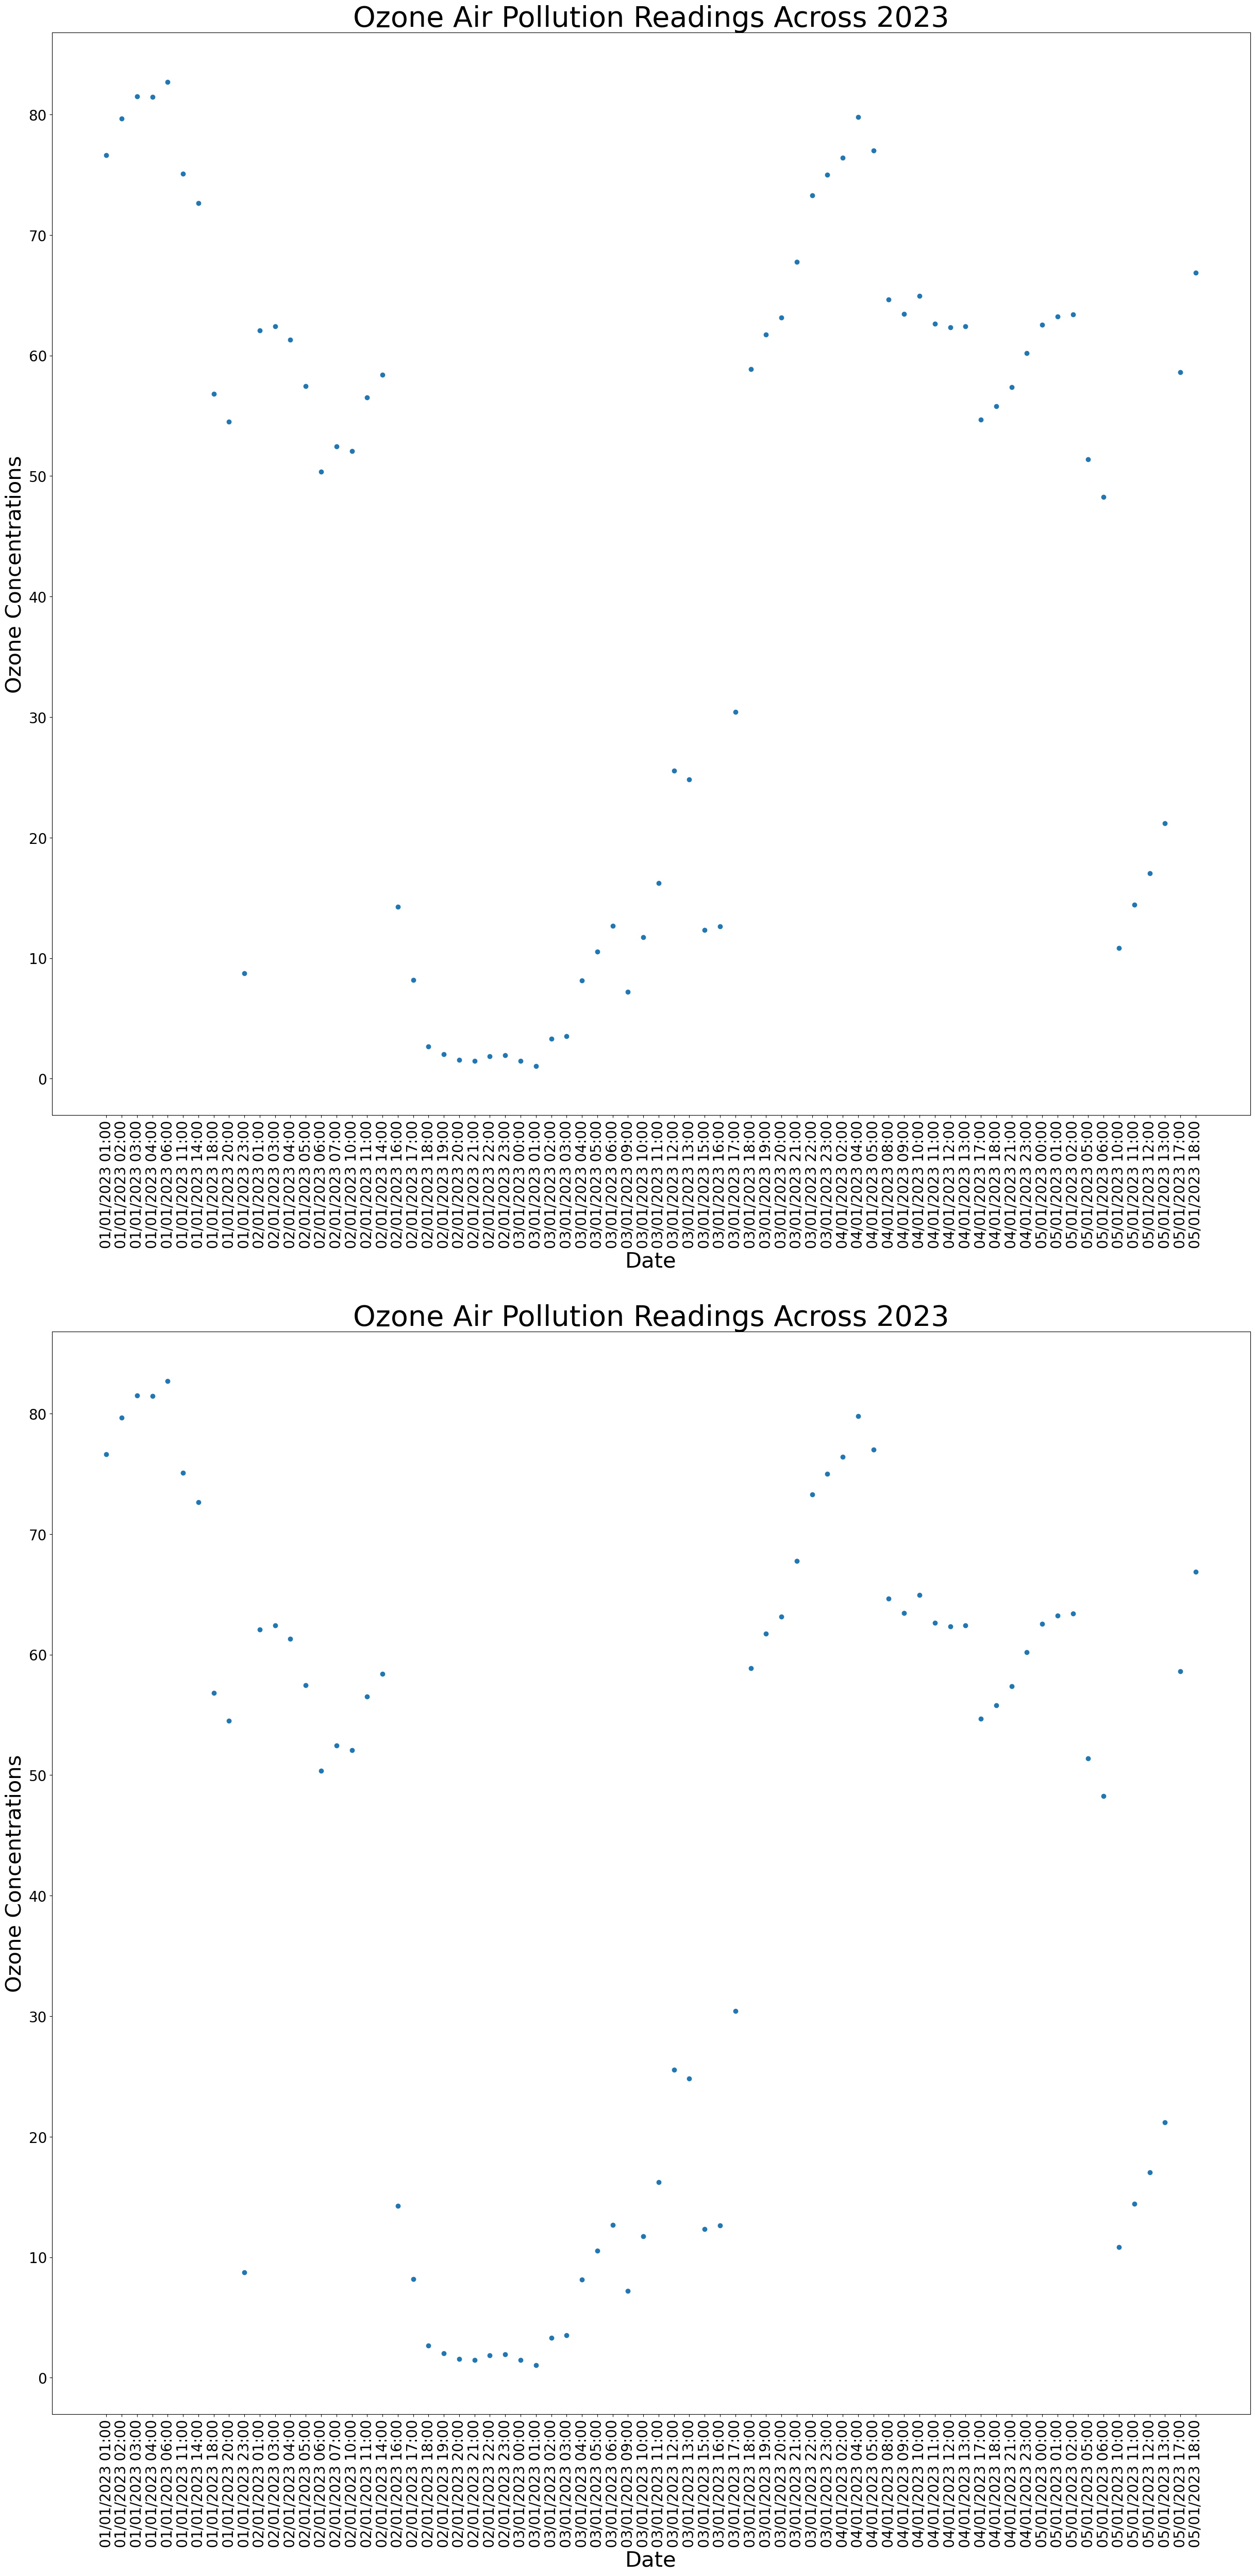

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(30,60))
axes[0].scatter(air_pollution_data_2023_complete_dataset_start["date"], air_pollution_data_2023_complete_dataset_start["O3"])
axes[0].set_title("Ozone Air Pollution Readings Across 2023", fontsize=40)
axes[0].set_xlabel("Date", fontsize=30)
axes[0].set_ylabel("Ozone Concentrations", fontsize=30)

axes[0].tick_params(axis='both', which='major', labelsize=20)

axes[0].tick_params(axis='x', rotation=90)

axes[1].scatter(air_pollution_data_2023_complete_dataset_start["date"], air_pollution_data_2023_complete_dataset_start["O3"])
axes[1].set_title("Ozone Air Pollution Readings Across 2023", fontsize=40)
axes[1].set_xlabel("Date", fontsize=30)
axes[1].set_ylabel("Ozone Concentrations", fontsize=30)

axes[1].tick_params(axis='both', which='major', labelsize=20)

axes[1].tick_params(axis='x', rotation=90)
plt.show()

### Box Plots 

Boxes plots have a range of different benefits when 

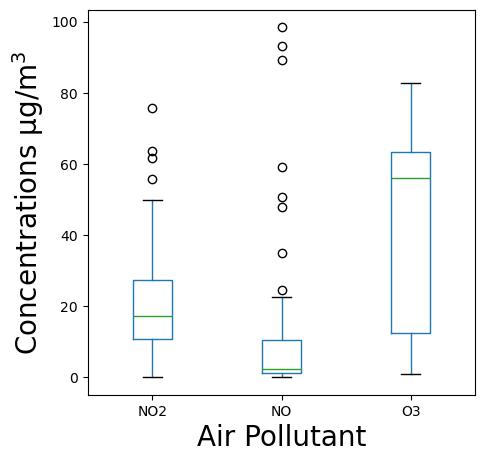

In [10]:
fig, axes = plt.subplots(1, figsize=(5,5))

air_pollution_data_2023_complete_dataset_start.boxplot(column=["NO2", "NO", "O3"], ax=axes)
axes.set_xlabel("Air Pollutant", fontsize=20)
axes.set_ylabel("Concentrations µg/m$^3$", fontsize=20)
axes.grid(False)
plt.show()

### Histograms 
A histogram is a great way to represent the distribution of numerical data, where data is divided into bins or intervals and the frequency of data points within each bin is depicted by the height of the bar. 

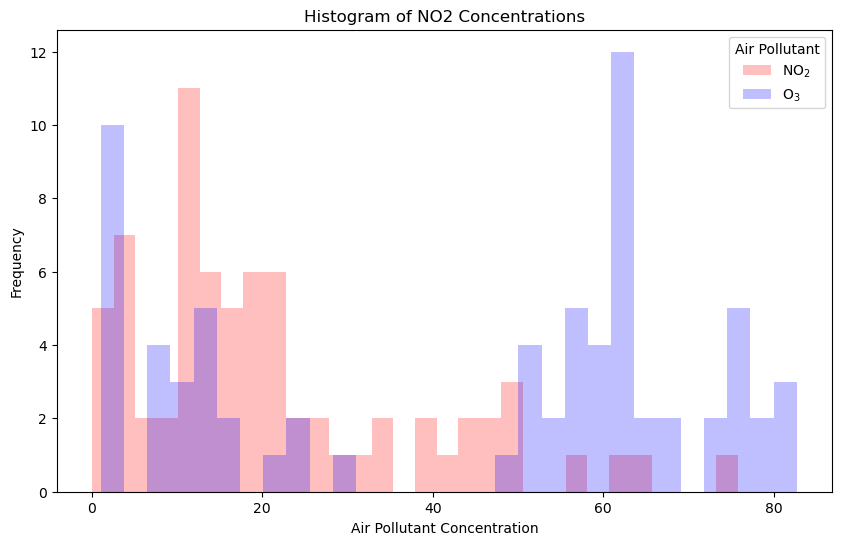

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(air_pollution_data_2023_complete_dataset_start['NO2'], bins=30, color='red', alpha=0.25, label="NO$_2$")
plt.hist(air_pollution_data_2023_complete_dataset_start['O3'], bins=30, color='blue', alpha=0.25, label = "O$_3$")
plt.title('Histogram of NO2 Concentrations')
plt.xlabel('Air Pollutant Concentration')
plt.ylabel('Frequency')
plt.legend(title="Air Pollutant")
plt.show()

## Further Examples
Within matplotlib there are a massive number of different possible outputs, that far exceed the scope of this course, with the particular one that you wish to use will depend on the task at hand. The [Matplotlib example gallery](https://matplotlib.org/stable/gallery/index.html) will be of use when exploring potential solutions.